In [1]:
path="/Users/mgrecu/GPM/ROSES2024/Data/"
import glob
fgmi=glob.glob(path+"1C*GMI*.HDF5")
fcmb=glob.glob(path+"2B.GPM*CORRA*.HDF5")
print(fgmi)
print(fcmb)
import netCDF4 as nc
with nc.Dataset(fgmi[0]) as f:
    lat_gmi_S1=f['S1/Latitude'][:]
    lon_gmi_S1=f['S1/Longitude'][:]
    tc_gmi_S1=f['S1/Tc'][:]
    lat_gmi_S2=f['S2/Latitude'][:]
    lon_gmi_S2=f['S2/Longitude'][:]
    tc_gmi_S2=f['S2/Tc'][:]

with nc.Dataset(fcmb[0]) as f:
    lat=f['KuKaGMI/Latitude'][:]
    lon=f['KuKaGMI/Longitude'][:]
    surf_type=f['KuKaGMI/Input/surfaceType'][:]
    qv=f['KuKaGMI/vaporDensity'][:]
    sk_temp=f['KuKaGMI/skinTemperature'][:]

import numpy as np
norm_param_land=np.load('GMI_ONNX_Models/norm_param_land.npz')

['/Users/mgrecu/GPM/ROSES2024/Data/1C.GPM.GMI.XCAL2016-C.20180625-S041042-E054316.024557.V07A.HDF5']
['/Users/mgrecu/GPM/ROSES2024/Data/2B.GPM.DPRGMI.CORRA2022OE.20180625-S041042-E054316.024557.ITE790.HDF5']


In [ ]:
print(norm_param_land.keys())
var_keys=norm_param_land.keys()
print(var_keys=list(var_keys))
print(norm_param_land['sfc_type'].shape)

KeysView(NpzFile 'GMI_ONNX_Models/norm_param_land.npz' with keys: tc, sfc_type, sk_temp, oe_wvp, near_sfc_precip...)
['tc', 'sfc_type', 'sk_temp', 'oe_wvp', 'near_sfc_precip', 'xenc', 'xenc_prec', 'xenv_enc']
(2, 128, 49)


In [2]:
import tb_resample 
tc_s1_resampled = tb_resample.grid_tb(tc_gmi_S1,lon_gmi_S1,lat_gmi_S1,lon,lat)
tc_s2_resampled = tb_resample.grid_tb(tc_gmi_S2,lon_gmi_S2,lat_gmi_S2,lon,lat)


In [1]:
import os
import sys
sys.path.append('/Users/mgrecu/onnxruntime-osx-arm64-1.20.1/lib/')
os.environ['DYLD_LIBRARY_PATH'] = '/Users/mgrecu/onnxruntime-osx-arm64-1.20.1/lib/'
os.environ['LD_LIBRARY_PATH'] = '/Users/mgrecu/onnxruntime-osx-arm64-1.20.1/lib/'

print(os.environ['LD_LIBRARY_PATH'])
import onnx_f90
print(dir(onnx_f90))

/Users/mgrecu/onnxruntime-osx-arm64-1.20.1/lib/


ImportError: dlopen(/Users/mgrecu/PMMCCST/onnx_f90.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libonnxruntime.1.20.1.dylib
  Referenced from: <EAE7D44F-623C-3429-BDF2-BB9C082FF505> /Users/mgrecu/PMMCCST/libonnx_c.so
  Reason: tried: '/Users/mgrecu/miniforge3/lib/libonnxruntime.1.20.1.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/mgrecu/miniforge3/lib/libonnxruntime.1.20.1.dylib' (no such file), '/Users/mgrecu/miniforge3/lib/libonnxruntime.1.20.1.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/mgrecu/miniforge3/lib/libonnxruntime.1.20.1.dylib' (no such file), '/Users/mgrecu/miniforge3/bin/../lib/libonnxruntime.1.20.1.dylib' (no such file), '/Users/mgrecu/miniforge3/bin/../lib/libonnxruntime.1.20.1.dylib' (no such file)

(7935, 49, 9)
151.893 304.76932


/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_5437/942281854.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_gmi_S1[n1g:n2g],lat_gmi_S1[n1g:n2g],tc_gmi_S1[n1g:n2g,:,7],cmap='jet',vmin=125,vmax=300)


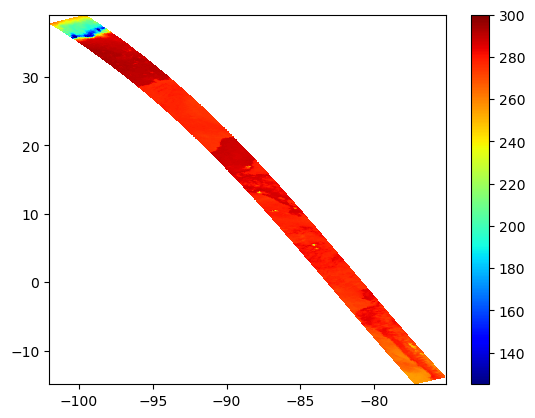

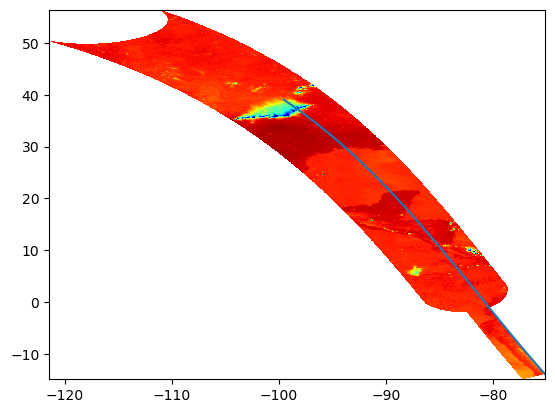

In [5]:
print(tc_s1_resampled.shape)

import matplotlib.pyplot as plt
n1=5000
n2=6300
plt.pcolormesh(lon[n1:n2,:],lat[n1:n2,:],tc_s1_resampled[n1:n2,:,7],cmap='jet',vmin=125,vmax=300)
plt.colorbar()
print(tc_s1_resampled[:,:,0].min(),tc_s1_resampled[:,:,0].max())
plt.figure()
n1g=1700
n2g=2200
plt.pcolormesh(lon_gmi_S1[n1g:n2g],lat_gmi_S1[n1g:n2g],tc_gmi_S1[n1g:n2g,:,7],cmap='jet',vmin=125,vmax=300)
plt.pcolormesh(lon[n1:n2,:],lat[n1:n2,:],tc_s1_resampled[n1:n2,:,7],cmap='jet',vmin=125,vmax=300)
plt.plot(lon[n1:n2,0],lat[n1:n2,0],'-')